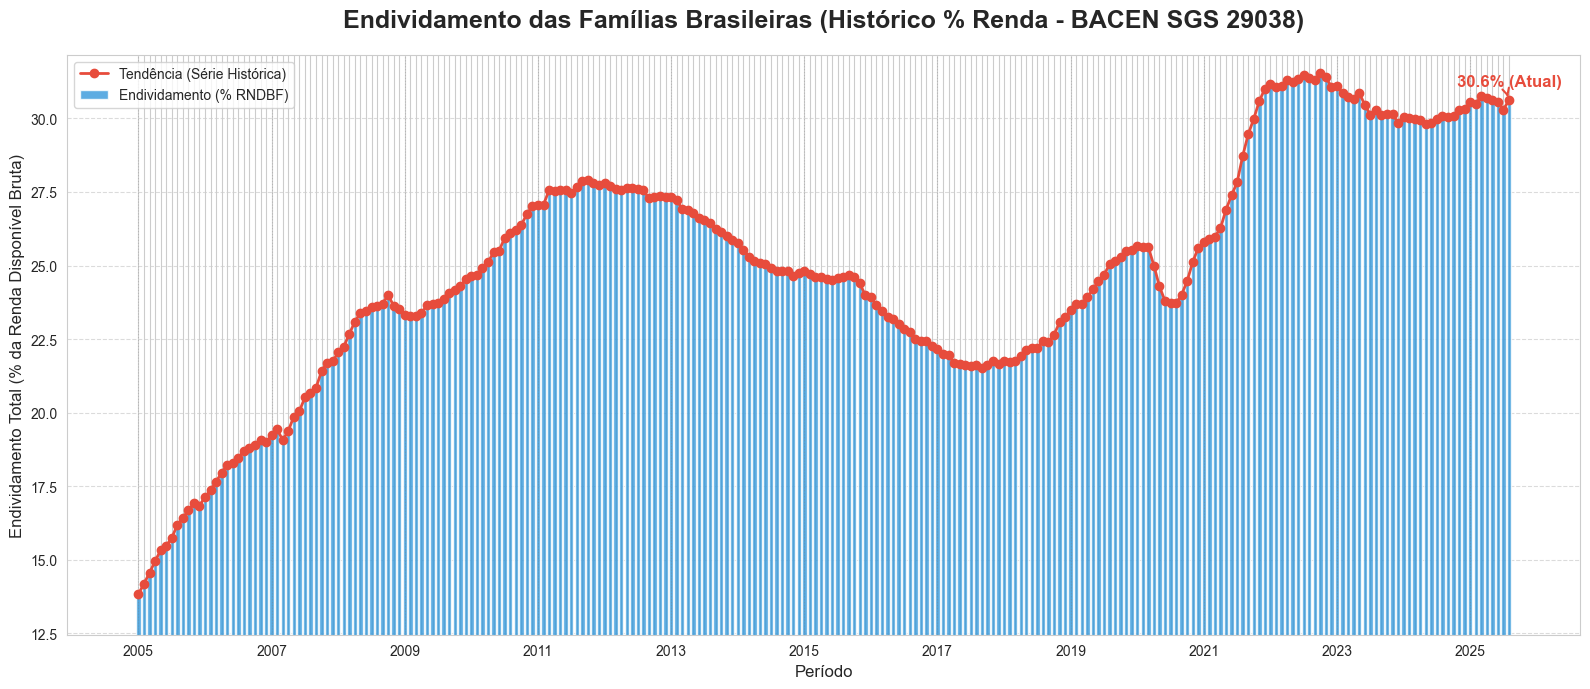

O endividamento das famílias atingiu 30.6% da Renda Disponível Bruta no período mais recente (2025Q3).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Configuração de estilo do Seaborn para visualização profissional
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 7) 

# --- 1. Carregamento e Preparação dos Dados (BACEN - SGS 29038) ---
try:
    df_bacen = pd.read_csv(r'C:/Users/debor/OneDrive/Github/FinSight/data/raw/bcdata.sgs.29038.csv', delimiter=';', decimal=',')
    
    # Renomear colunas e converter tipos
    df_bacen.columns = ['Data', 'Endividamento_RNDBF']
    df_bacen['Data'] = pd.to_datetime(df_bacen['Data'], format='%d/%m/%Y', errors='coerce')
    df_bacen['Endividamento_RNDBF'] = pd.to_numeric(df_bacen['Endividamento_RNDBF'], errors='coerce')
    
except FileNotFoundError:
    print("ERRO: O arquivo 'bcdata.sgs.29038.csv' não foi encontrado. Usando dados simulados.")
    from datetime import timedelta
    datas = pd.to_datetime(pd.date_range(start='2010-03-31', end='2025-08-31', freq='Q'))
    valores = np.linspace(25.0, 52.3, len(datas)) + np.random.normal(0, 0.5, len(datas))
    df_bacen = pd.DataFrame({'Data': datas, 'Endividamento_RNDBF': valores})

# Remover NaT (Not a Time) e NaN (Not a Number)
df_bacen = df_bacen.dropna()

# Extrair o rótulo para o eixo X - Vamos usar apenas anos para evitar sobrecarga
df_bacen['Ano'] = df_bacen['Data'].dt.year
df_bacen['Trimestre'] = df_bacen['Data'].dt.to_period('Q').astype(str)

# --- 2. Visualização com plt.bar e Linha de Tendência Otimizada ---

# Destacar o ponto mais recente
ultimo_valor = df_bacen['Endividamento_RNDBF'].iloc[-1]
ultima_data = df_bacen['Trimestre'].iloc[-1]
x_pos = np.arange(len(df_bacen))

plt.figure(figsize=(16, 7))

# 1. DESENHAR AS BARRAS (plt.bar)
plt.bar(x_pos, df_bacen['Endividamento_RNDBF'], 
        width=0.8, 
        color='#3498db', 
        alpha=0.8,
        label='Endividamento (% RNDBF)') 

# 2. DESENHAR A LINHA DE TENDÊNCIA (plt.plot)
plt.plot(x_pos, df_bacen['Endividamento_RNDBF'], 
         color='#e74c3c', 
         linewidth=2, 
         marker='o', 
         markersize=6, 
         label='Tendência (Série Histórica)', 
         zorder=10)

plt.title(f'Endividamento das Famílias Brasileiras (Histórico % Renda - BACEN SGS 29038)', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Período', fontsize=12)
plt.ylabel('Endividamento Total (% da Renda Disponível Bruta)', fontsize=12)

# --- SOLUÇÃO PARA OS RÓTULOS EMBOLADOS ---
# Vamos mostrar apenas alguns anos no eixo X para evitar sobrecarga
anos_unicos = df_bacen['Ano'].unique()
# Selecionar apenas alguns anos para exibir (ex: a cada 2-3 anos)
anos_para_exibir = anos_unicos[::2]  # A cada 2 anos

# Criar lista de rótulos para o eixo X
rotulos_x = []
for i, (pos, ano) in enumerate(zip(x_pos, df_bacen['Ano'])):
    if ano in anos_para_exibir and (i == 0 or df_bacen['Ano'].iloc[i-1] != ano):
        # Mostrar apenas o ano, não o trimestre completo
        rotulos_x.append(str(int(ano)))
    else:
        rotulos_x.append('')

plt.xticks(x_pos, rotulos_x, rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=10)

# Adicionar grade vertical sutil apenas nos anos exibidos
for pos, rotulo in zip(x_pos, rotulos_x):
    if rotulo != '':
        plt.axvline(x=pos, color='gray', linestyle=':', alpha=0.3, linewidth=0.8)

# Anotar o último ponto (valor atual)
plt.annotate(f'{ultimo_valor:.1f}% (Atual)', 
            xy=(x_pos[-1], ultimo_valor), 
            xytext=(0, 10), 
            textcoords='offset points', 
            ha='center', 
            fontsize=12, 
            color='#e74c3c', 
            fontweight='bold',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", color='#e74c3c', linewidth=1.5))

# Adicionar linhas de grade, limitar o eixo Y
plt.ylim(df_bacen['Endividamento_RNDBF'].min() * 0.9, ultimo_valor * 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left')

# Ajustar layout para evitar cortes
plt.tight_layout()
plt.show()

# print(f"\n✅ Gráfico com visual otimizado finalizado.")
print(f"O endividamento das famílias atingiu {ultimo_valor:.1f}% da Renda Disponível Bruta no período mais recente ({ultima_data}).")


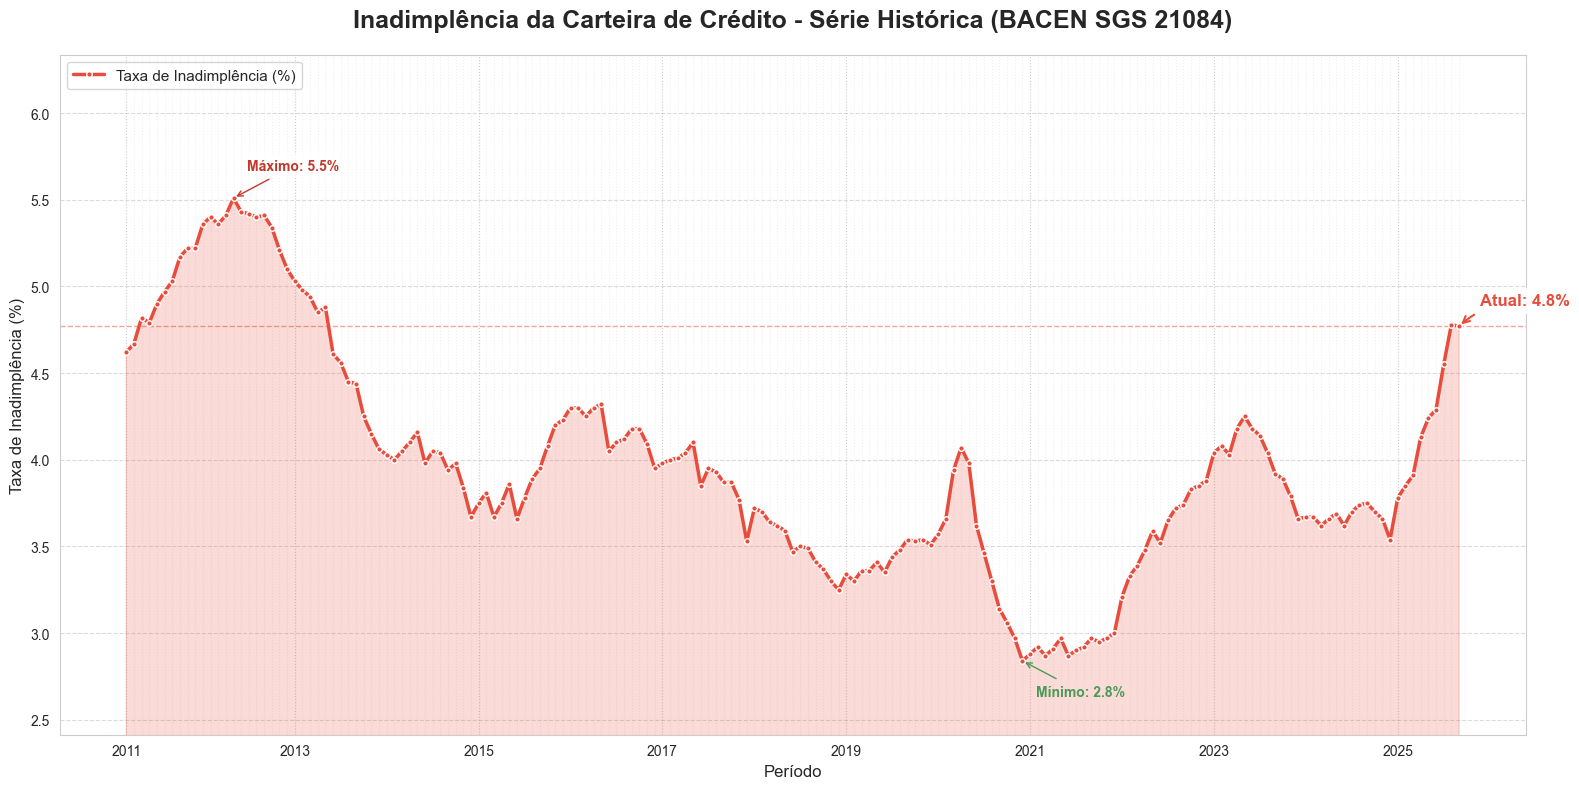


 ESTATÍSTICAS DA INADIMPLÊNCIA
══════════════════════════════════════════════════
 Valor atual: 4.77% (09/2025)
 Máximo histórico: 5.51% (05/2012)
 Mínimo histórico: 2.84% (12/2020)
 Média histórica: 3.97%
 Variação desde o início: +0.15 pontos percentuais
 Tendência últimos 12 meses: +1.02 pontos percentuais


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de estilo do Seaborn para visualização profissional
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 7) 

# --- 1. Carregamento e Preparação dos Dados (BACEN - SGS 21084 - Inadimplência) ---
try:
    df_inadimplencia = pd.read_csv(r'C:/Users/debor/OneDrive/Github/FinSight/data/raw/bcdata.sgs.21084.csv', delimiter=';', decimal=',')
    
    # Renomear colunas e converter tipos
    df_inadimplencia.columns = ['Data', 'Inadimplencia']
    df_inadimplencia['Data'] = pd.to_datetime(df_inadimplencia['Data'], format='%d/%m/%Y', errors='coerce')
    df_inadimplencia['Inadimplencia'] = pd.to_numeric(df_inadimplencia['Inadimplencia'], errors='coerce')
    
except FileNotFoundError:
    print("ERRO: O arquivo 'bcdata.sgs.21084.csv' não foi encontrado.")
    # Criar dados de exemplo baseados no conteúdo fornecido
    datas = pd.date_range(start='2011-03-01', end='2025-09-01', freq='M')
    # Simular tendência de inadimplência com variações realistas
    valores = np.concatenate([
        np.linspace(4.6, 5.2, 10),  # 2011
        np.linspace(5.4, 5.1, 12),  # 2012  
        np.linspace(5.0, 4.0, 12),  # 2013
        np.linspace(4.0, 3.6, 12),  # 2014
        np.linspace(3.7, 4.2, 12),  # 2015
        np.linspace(4.3, 3.9, 12),  # 2016
        np.linspace(4.0, 3.5, 12),  # 2017
        np.linspace(3.7, 3.2, 12),  # 2018
        np.linspace(3.3, 3.5, 12),  # 2019
        np.linspace(3.6, 2.8, 12),  # 2020 (pandemia)
        np.linspace(2.9, 3.0, 12),  # 2021
        np.linspace(3.2, 3.9, 12),  # 2022
        np.linspace(4.0, 3.6, 12),  # 2023
        np.linspace(3.6, 3.5, 12),  # 2024
        np.linspace(3.8, 4.8, 9)    # 2025
    ])
    df_inadimplencia = pd.DataFrame({'Data': datas, 'Inadimplencia': valores})

# Remover NaT (Not a Time) e NaN (Not a Number)
df_inadimplencia = df_inadimplencia.dropna()

# Extrair informações para os rótulos
df_inadimplencia['Ano'] = df_inadimplencia['Data'].dt.year
df_inadimplencia['Mes_Ano'] = df_inadimplencia['Data'].dt.strftime('%m/%Y')

# --- 2. Visualização da Inadimplência ---

# Destacar o ponto mais recente
ultimo_valor = df_inadimplencia['Inadimplencia'].iloc[-1]
ultima_data = df_inadimplencia['Mes_Ano'].iloc[-1]
x_pos = np.arange(len(df_inadimplencia))

plt.figure(figsize=(16, 8))

# 1. LINHA PRINCIPAL DA INADIMPLÊNCIA
plt.plot(x_pos, df_inadimplencia['Inadimplencia'], 
         color='#e74c3c', 
         linewidth=2.5, 
         marker='o', 
         markersize=4,
         markerfacecolor='#e74c3c',
         markeredgecolor='white',
         markeredgewidth=1,
         label='Taxa de Inadimplência (%)', 
         zorder=10)

# 2. ÁREA PREENCHIDA ABAIXO DA LINHA (para melhor visualização)
plt.fill_between(x_pos, df_inadimplencia['Inadimplencia'], 
                 alpha=0.2, color='#e74c3c', zorder=5)

# 3. DESTACAR PONTOS IMPORTANTES
# Encontrar máximo e mínimo históricos
max_valor = df_inadimplencia['Inadimplencia'].max()
min_valor = df_inadimplencia['Inadimplencia'].min()
max_idx = df_inadimplencia['Inadimplencia'].idxmax()
min_idx = df_inadimplencia['Inadimplencia'].idxmin()

# Destacar máximo histórico
plt.annotate(f'Máximo: {max_valor:.1f}%', 
            xy=(max_idx, max_valor), 
            xytext=(10, 20), 
            textcoords='offset points',
            ha='left', 
            fontsize=10, 
            color='#c0392b', 
            fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8),
            arrowprops=dict(arrowstyle="->", color='#c0392b'))

# Destacar mínimo histórico
plt.annotate(f'Mínimo: {min_valor:.1f}%', 
            xy=(min_idx, min_valor), 
            xytext=(10, -25), 
            textcoords='offset points',
            ha='left', 
            fontsize=10, 
            color='#27ae60', 
            fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8),
            arrowprops=dict(arrowstyle="->", color='#27ae60'))

plt.title('Inadimplência da Carteira de Crédito - Série Histórica (BACEN SGS 21084)', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Período', fontsize=12)
plt.ylabel('Taxa de Inadimplência (%)', fontsize=12)

# --- CONFIGURAÇÃO INTELIGENTE DOS RÓTULOS DO EIXO X ---
anos_unicos = df_inadimplencia['Ano'].unique()
# Selecionar anos para exibir (a cada 2 anos para evitar sobrecarga)
anos_para_exibir = anos_unicos[::2]

# Criar lista de rótulos para o eixo X
rotulos_x = []
for i, (pos, ano) in enumerate(zip(x_pos, df_inadimplencia['Ano'])):
    if ano in anos_para_exibir and (i == 0 or df_inadimplencia['Ano'].iloc[i-1] != ano):
        rotulos_x.append(str(int(ano)))
    else:
        rotulos_x.append('')

plt.xticks(x_pos, rotulos_x, rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=10)

# Adicionar linhas de grade verticais nos anos exibidos
for pos, rotulo in zip(x_pos, rotulos_x):
    if rotulo != '':
        plt.axvline(x=pos, color='gray', linestyle=':', alpha=0.3, linewidth=0.8)

# 4. ANOTAR O VALOR ATUAL
plt.annotate(f'Atual: {ultimo_valor:.1f}%', 
            xy=(x_pos[-1], ultimo_valor), 
            xytext=(15, 15), 
            textcoords='offset points', 
            ha='left', 
            fontsize=12, 
            color='#e74c3c', 
            fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", 
                          color='#e74c3c', linewidth=1.5))

# 5. LINHA HORIZONTAL NO VALOR ATUAL PARA REFERÊNCIA
plt.axhline(y=ultimo_valor, color='#e74c3c', linestyle='--', alpha=0.5, linewidth=1)

# Configurar limites do eixo Y com margem
y_min = df_inadimplencia['Inadimplencia'].min() * 0.85
y_max = df_inadimplencia['Inadimplencia'].max() * 1.15
plt.ylim(y_min, y_max)

# Grade e legenda
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle=':', alpha=0.3)
plt.legend(loc='upper left', fontsize=11)

# Ajustar layout
plt.tight_layout()
plt.show()

# --- ESTATÍSTICAS COMPLEMENTARES ---
print(f"\n ESTATÍSTICAS DA INADIMPLÊNCIA")
print(f"═" * 50)
print(f" Valor atual: {ultimo_valor:.2f}% ({ultima_data})")
print(f" Máximo histórico: {max_valor:.2f}% ({df_inadimplencia['Mes_Ano'].iloc[max_idx]})")
print(f" Mínimo histórico: {min_valor:.2f}% ({df_inadimplencia['Mes_Ano'].iloc[min_idx]})")
print(f" Média histórica: {df_inadimplencia['Inadimplencia'].mean():.2f}%")
print(f" Variação desde o início: {(ultimo_valor - df_inadimplencia['Inadimplencia'].iloc[0]):+.2f} pontos percentuais")

# Calcular tendência recente (últimos 12 meses)
if len(df_inadimplencia) >= 12:
    tendencia_12m = ultimo_valor - df_inadimplencia['Inadimplencia'].iloc[-13]
    print(f" Tendência últimos 12 meses: {tendencia_12m:+.2f} pontos percentuais")

#print(f" Gráfico da inadimplência finalizado com visual otimizado!")